<a href="https://colab.research.google.com/github/Marcin19721205/DecisionTrees_RandomForest/blob/main/01_decision_tree_iris_01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

## Pierwsze Drzewo Decyzyjne

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
sns.set()

### Załadowanie danych

In [2]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print('Liczba próbek:', len(data))
print('Kształt danych', data.shape)
print('Nazwy zmiennych objaśniających:', feature_names)
print('Nazwy kategorii kosaćca:', class_names)

Liczba próbek: 150
Kształt danych (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### Iris Setosa

In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=300)

### Iris Versicolor

In [4]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=300)

### Iris Virginica

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=300)

## Poznaj swoje dane

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df.describe().apply(lambda x: round(x, 2))

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

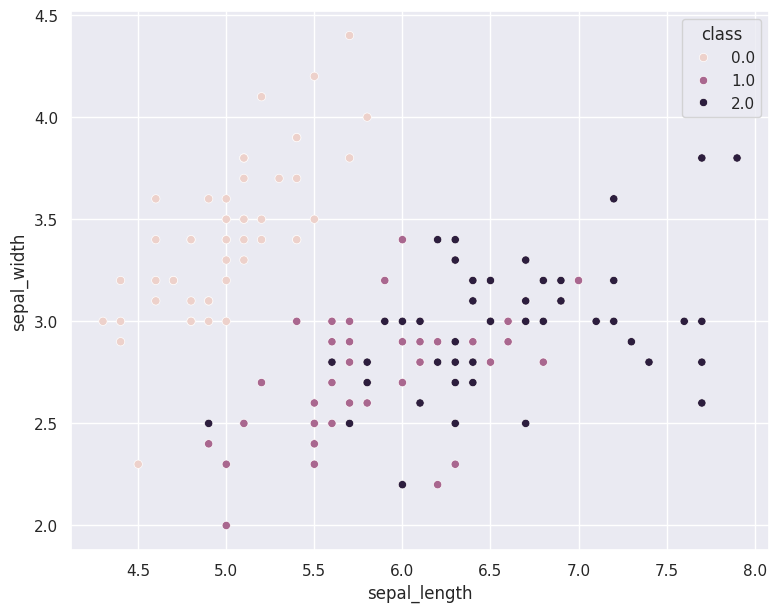

In [10]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df, legend='full')

<Axes: xlabel='petal_length', ylabel='petal_width'>

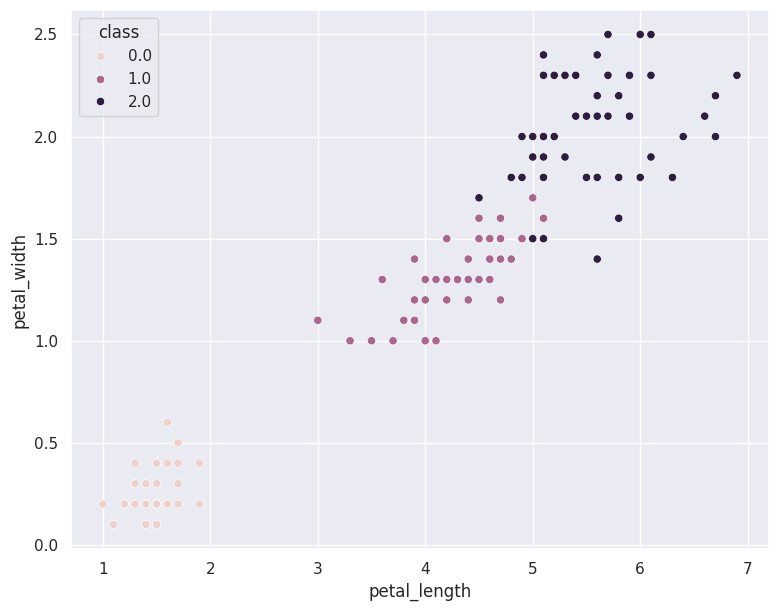

In [12]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=df, legend='full')

In [13]:
df['class'].value_counts()

,count
class,
0.0,50
1.0,50
2.0,50


### Przygotowanie danych do modelu

In [14]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [15]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [16]:
y.head()

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Konwersja DataFrame do tablic numpy

In [ ]:
X = X.values
y = y.values.astype('int16')

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [17]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

### Wykreślenie granic decyzyjnych

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=1')

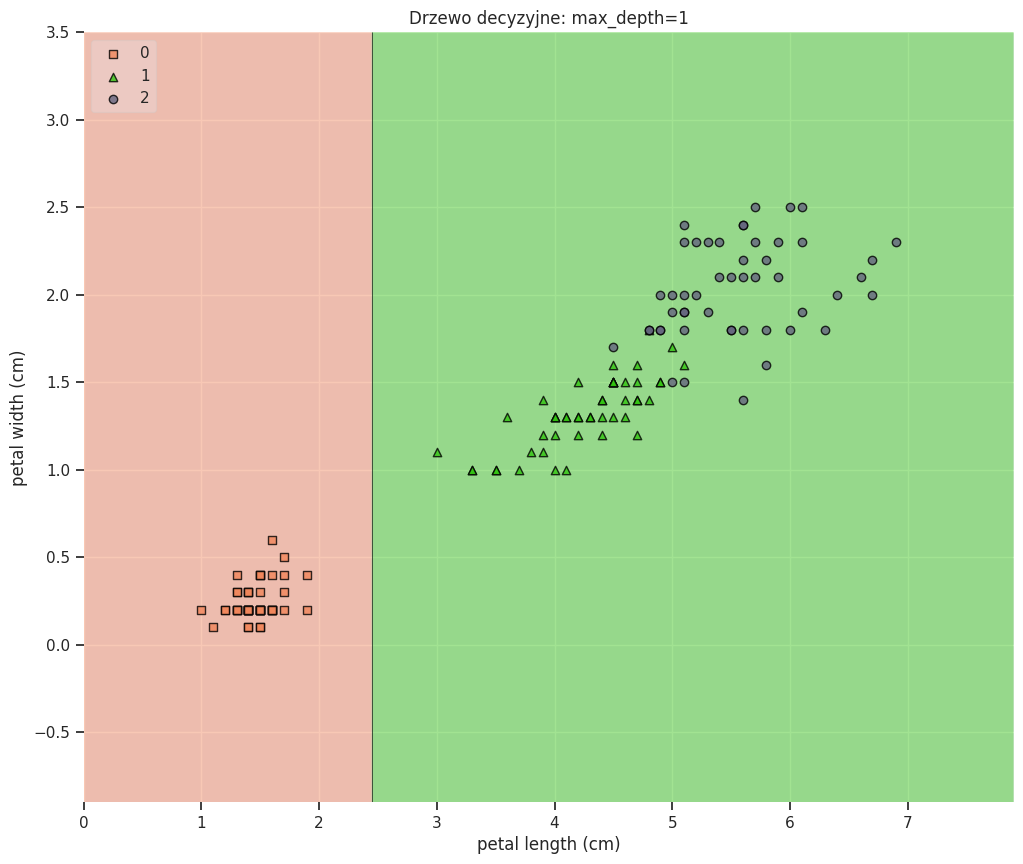

In [19]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
# Convert X (DataFrame) and y (Series) to NumPy arrays as required by plot_decision_regions
plot_decision_regions(X.values, y.values.astype('int16'), tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')

In [20]:
print('Dokładność modelu: ' + str(round(tree_clf.score(X, y), 4) * 100) + '%')

Dokładność modelu: 66.67%


### Graf drzewa decyzyjnego
- max_depth = 1

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

### Przekonwertowanie pliku .dot na plik .png

In [22]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_1.png

### Bardziej przyjazny dla Python'a sposób

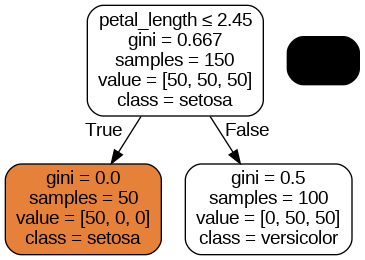

In [24]:
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

### Budowa prostej funkcji dla modelu drzewa decyzyjnego

In [29]:
def make_decision_tree(max_depth=1):
    # Ensure X and y are NumPy arrays for the function's scope
    X_np = X.values
    y_np = y.values.astype('int16')

    # train model
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    tree_clf.fit(X_np, y_np)

    # export graph
    dot_data = StringIO()
    export_graphviz(tree_clf,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')


    # plot decision boundries
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(12, 10))
    ax = plot_decision_regions(X_np, y_np, tree_clf, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title('Drzewo decyzyjne: max_depth={}'.format(max_depth))

    # accuracy
    print('Dokładność modelu: ' + str(round(tree_clf.score(X_np, y_np) * 100, 2)) + '%')
    return Image(graph.create_png())

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=2


Dokładność modelu: 96.0%


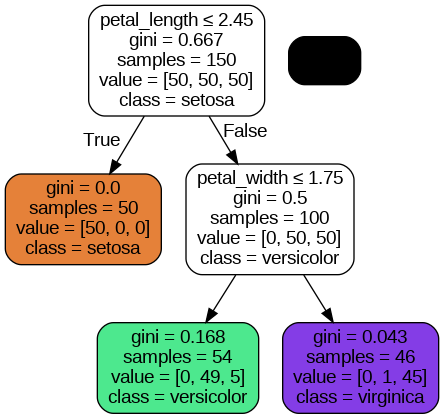

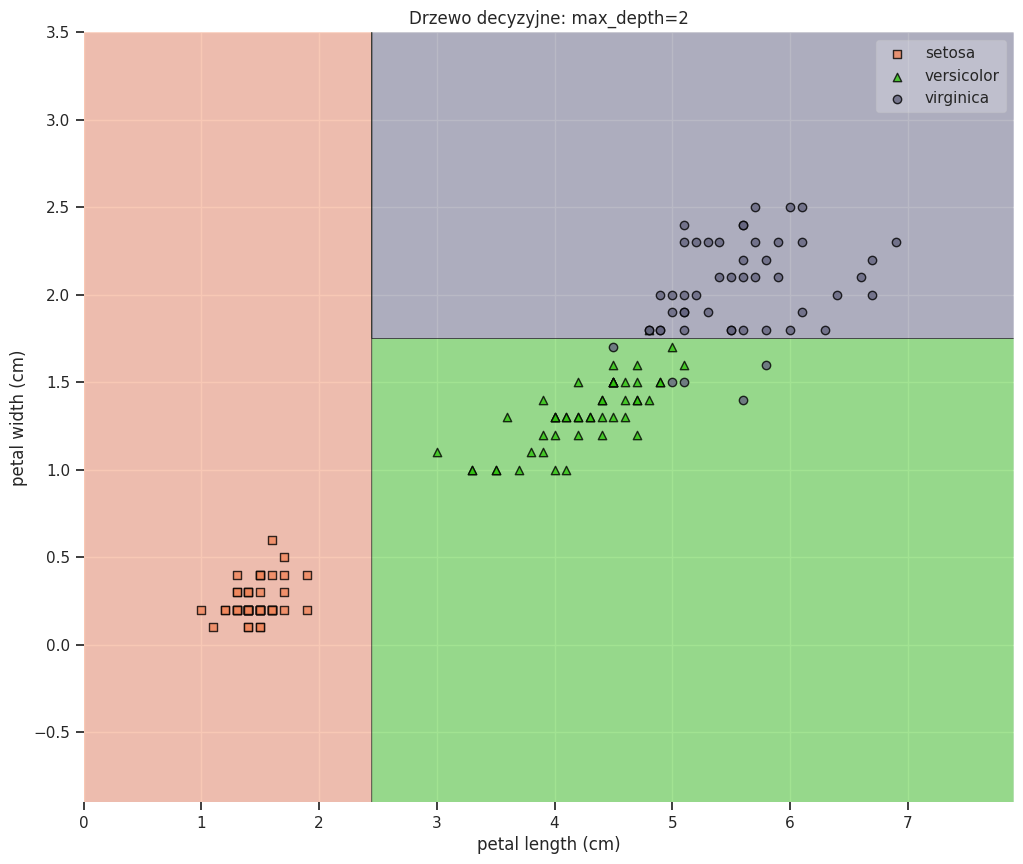

In [30]:
make_decision_tree(max_depth=2)

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=3

Dokładność modelu: 97.33%


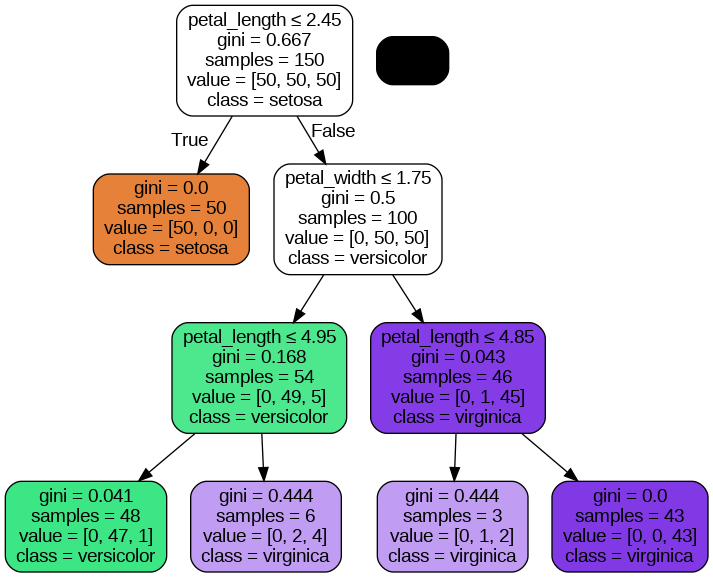

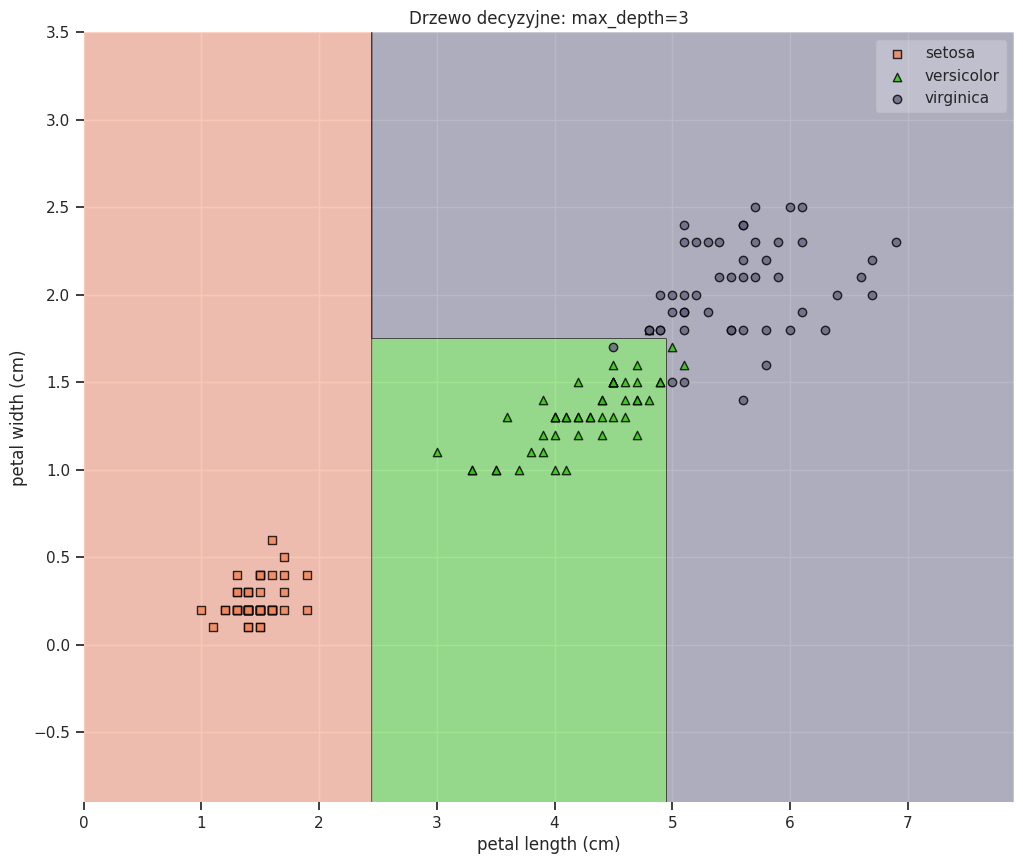

In [31]:
make_decision_tree(max_depth=3)

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=4

Dokładność modelu: 98.67%


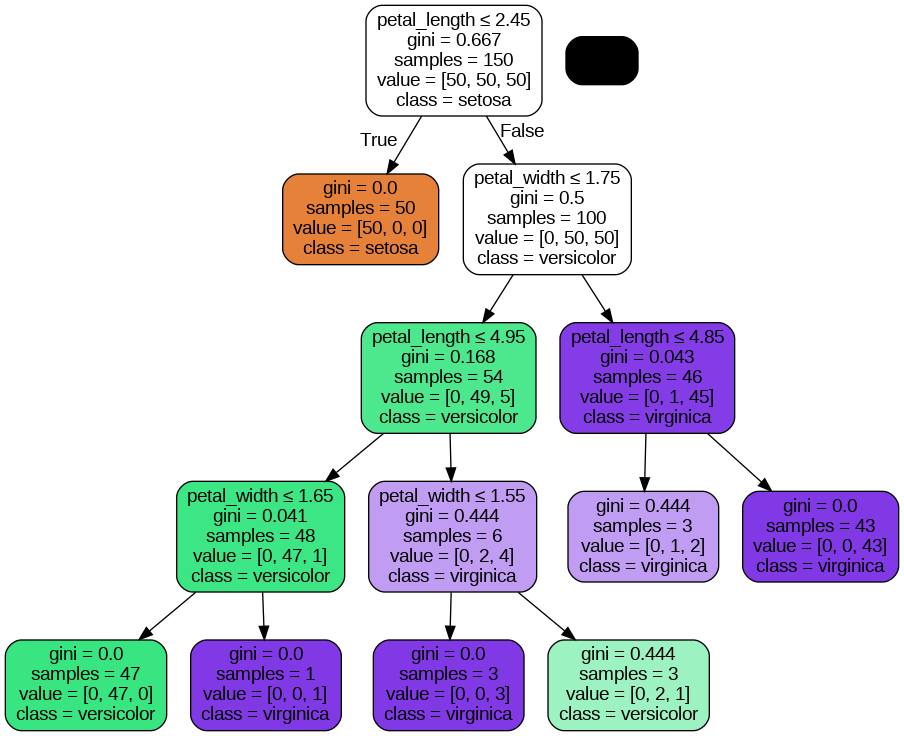

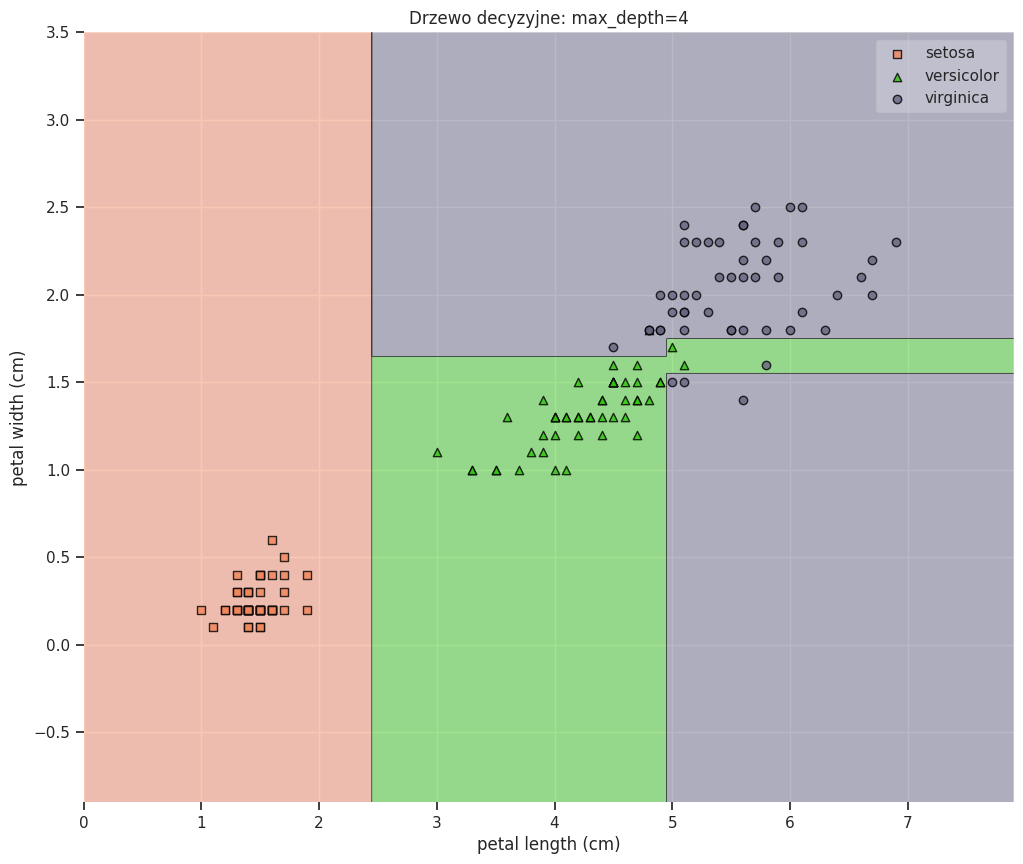

In [32]:
make_decision_tree(max_depth=4)

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=5

Dokładność modelu: 99.33%


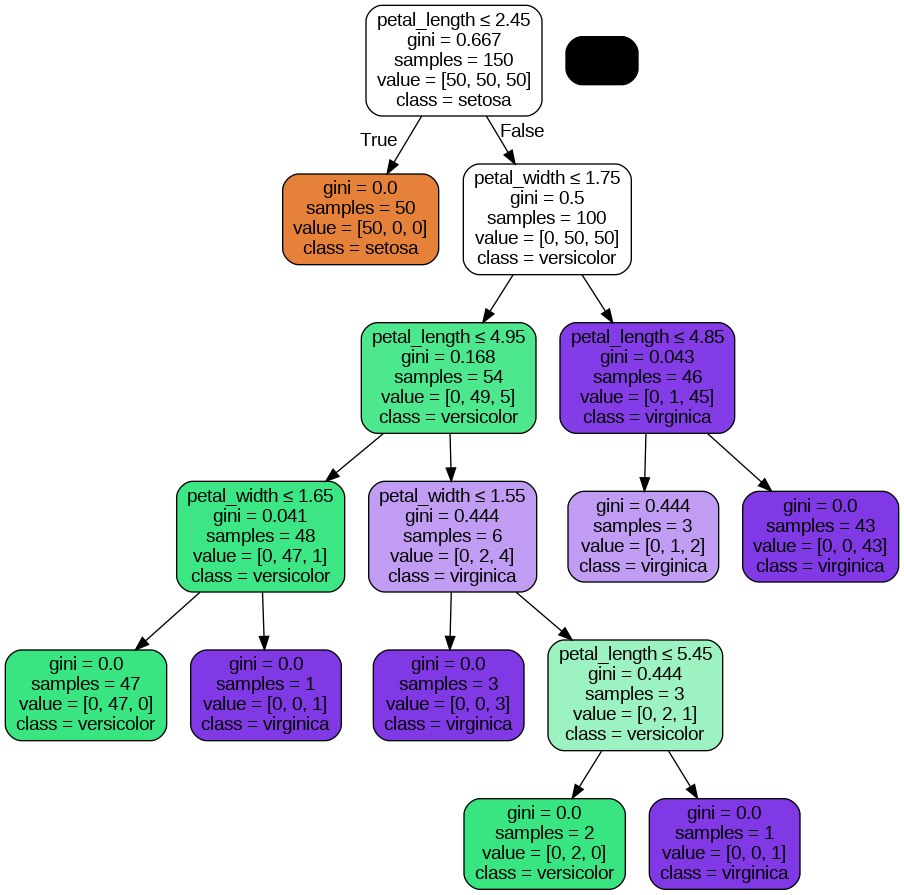

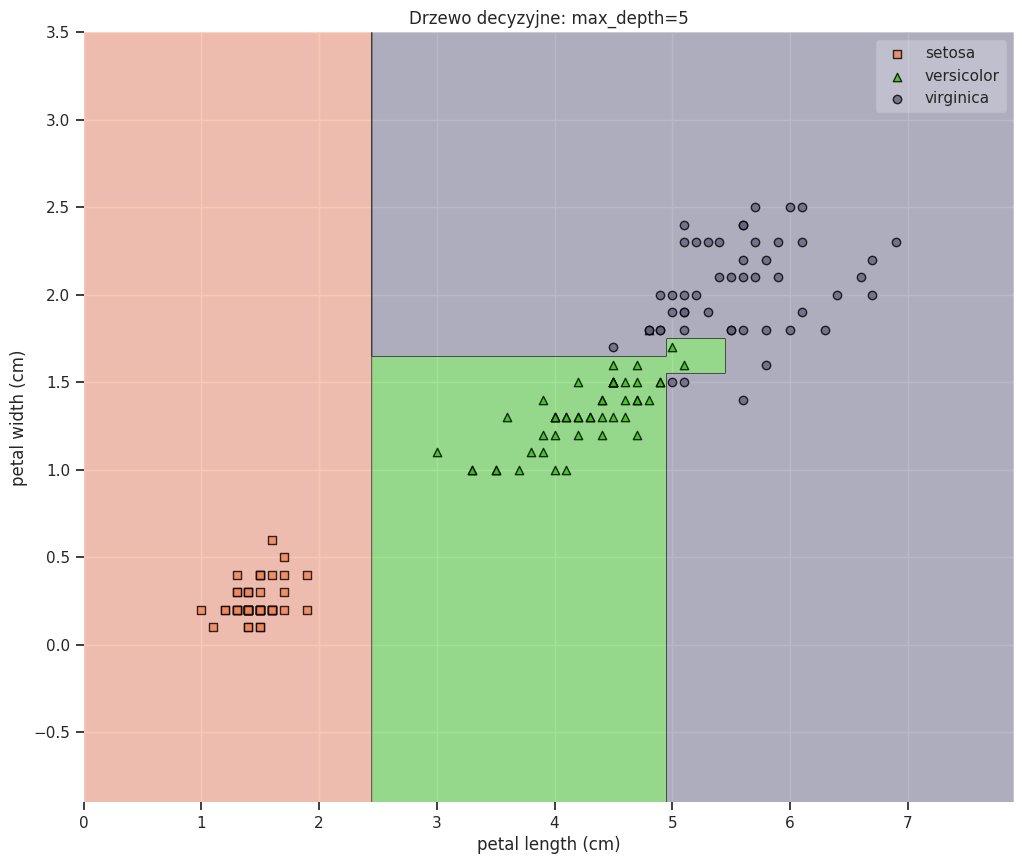

In [33]:
make_decision_tree(max_depth=5)